# Task 2

In [1]:
#Read csv file
import requests
import csv
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
#Loading data from the csv file
import pandas as pd
import io
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
url='https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv'
data=requests.get(url)
content = data.text
df = pd.read_csv(io.StringIO(content))
#Show the first 5 row in the dataset
df.head()


,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [2]:
#Show the last 5 row in the dataset
df.tail()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56


In [3]:
#show the overall of the dataset
df.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


array([[<Axes: title={'center': 'Open'}>,
        <Axes: title={'center': 'High'}>,
        <Axes: title={'center': 'Low'}>],
       [<Axes: title={'center': 'Last'}>,
        <Axes: title={'center': 'Close'}>,
        <Axes: title={'center': 'Total Trade Quantity'}>],
       [<Axes: title={'center': 'Turnover (Lacs)'}>, <Axes: >, <Axes: >]],
      dtype=object)

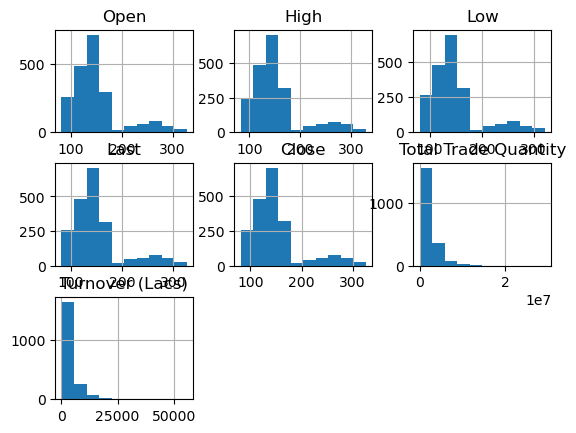

In [4]:
# Bar chart of the dataset 
df.hist()

In [5]:
df1=df.reset_index()['Close']

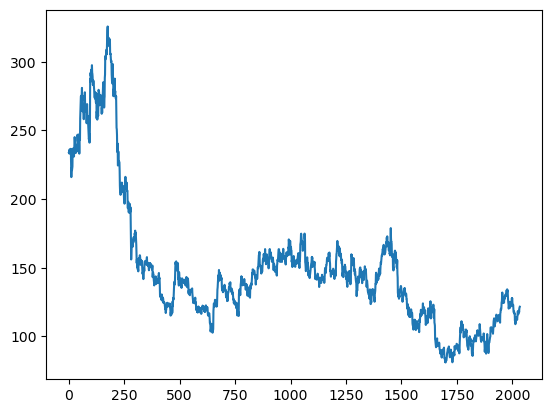

In [6]:
plt.plot(df1)

In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]


In [8]:
training_size, test_size

(1322, 713)

In [ ]:

import numpy
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [41]:
# reshape input
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [42]:
#Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [44]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


model.summary()

In [45]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [46]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
20/20 [==============================] - 5s 153ms/step - loss: 0.0329 - val_loss: 0.0058
Epoch 2/100
20/20 [==============================] - 2s 124ms/step - loss: 0.0048 - val_loss: 0.0016
Epoch 3/100
20/20 [==============================] - 2s 124ms/step - loss: 0.0018 - val_loss: 9.0355e-04
Epoch 4/100
20/20 [==============================] - 2s 125ms/step - loss: 0.0017 - val_loss: 0.0012
Epoch 5/100
20/20 [==============================] - 3s 128ms/step - loss: 0.0016 - val_loss: 0.0014
Epoch 6/100
20/20 [==============================] - 3s 131ms/step - loss: 0.0016 - val_loss: 0.0014
Epoch 7/100
20/20 [==============================] - 3s 134ms/step - loss: 0.0016 - val_loss: 8.3382e-04
Epoch 8/100
20/20 [==============================] - 3s 134ms/step - loss: 0.0017 - val_loss: 0.0015
Epoch 9/100
20/20 [==============================] - 3s 135ms/step - loss: 0.0019 - val_loss: 0.0015
Epoch 10/100
20/20 [==============================] - 3s 134ms/step - loss: 0.0018 

In [51]:
import tensorflow as tf
#prediction 
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

20/20 [==============================] - 0s 18ms/step


In [52]:
#Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [53]:
# Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

0.015928621414780773

In [54]:
# Test Data
math.sqrt(mean_squared_error(ytest,test_predict))

0.01628555030360499

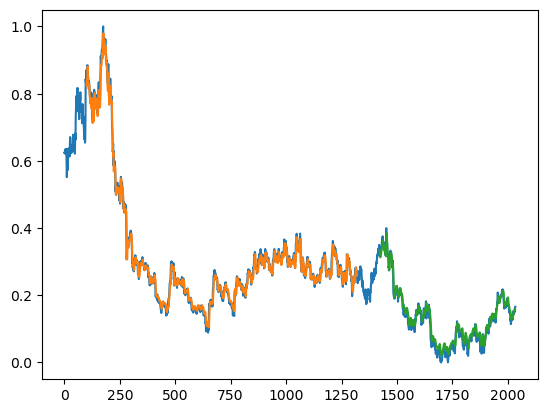

In [55]:
### Plotting 
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [56]:
len(test_data)

713

In [57]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 372)

In [58]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [59]:
temp_input

[0.048815359477124176,
 0.048815359477124176,
 0.05310457516339867,
 0.049632352941176405,
 0.05065359477124176,
 0.05126633986928103,
 0.049632352941176405,
 0.05902777777777779,
 0.055555555555555525,
 0.040849673202614345,
 0.037377450980392135,
 0.037377450980392135,
 0.026552287581699308,
 0.02879901960784309,
 0.03165849673202614,
 0.03165849673202614,
 0.036356209150326724,
 0.022058823529411742,
 0.016748366013071836,
 0.014501633986928053,
 0.022263071895424813,
 0.03615196078431371,
 0.02675653594771238,
 0.03206699346405223,
 0.02696078431372545,
 0.035743464052287566,
 0.03594771241830064,
 0.0404411764705882,
 0.039215686274509776,
 0.044117647058823484,
 0.029820261437908446,
 0.012254901960784326,
 0.012867647058823484,
 0.011437908496731986,
 0.0024509803921567985,
 0.005923202614379064,
 0.0,
 0.007148692810457491,
 0.0042892156862744946,
 0.006740196078431349,
 0.006331699346405206,
 0.011233660130718914,
 0.019607843137254888,
 0.02757352941176472,
 0.030024509803921

In [62]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=371
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

0 day input [0.04881536 0.05310458 0.04963235 0.05065359 0.05126634 0.04963235
 0.05902778 0.05555556 0.04084967 0.03737745 0.03737745 0.02655229
 0.02879902 0.0316585  0.0316585  0.03635621 0.02205882 0.01674837
 0.01450163 0.02226307 0.03615196 0.02675654 0.03206699 0.02696078
 0.03574346 0.03594771 0.04044118 0.03921569 0.04411765 0.02982026
 0.0122549  0.01286765 0.01143791 0.00245098 0.0059232  0.
 0.00714869 0.00428922 0.0067402  0.0063317  0.01123366 0.01960784
 0.02757353 0.03002451 0.03349673 0.04003268 0.04084967 0.03982843
 0.04166667 0.04370915 0.04758987 0.03594771 0.02839052 0.02410131
 0.01715686 0.01531863 0.01756536 0.02696078 0.02696078 0.03819444
 0.02839052 0.02369281 0.02920752 0.02328431 0.01919935 0.00653595
 0.00061275 0.00796569 0.01245915 0.01981209 0.01940359 0.02246732
 0.03125    0.02348856 0.0249183  0.02144608 0.04840686 0.04575163
 0.03962418 0.03921569 0.04758987 0.04513889 0.04166667 0.04125817
 0.05044935 0.05555556 0.05494281 0.05412582 0.0435049  0.

4 day output [[0.1736454]]
5 day input [0.04963235 0.05902778 0.05555556 0.04084967 0.03737745 0.03737745
 0.02655229 0.02879902 0.0316585  0.0316585  0.03635621 0.02205882
 0.01674837 0.01450163 0.02226307 0.03615196 0.02675654 0.03206699
 0.02696078 0.03574346 0.03594771 0.04044118 0.03921569 0.04411765
 0.02982026 0.0122549  0.01286765 0.01143791 0.00245098 0.0059232
 0.         0.00714869 0.00428922 0.0067402  0.0063317  0.01123366
 0.01960784 0.02757353 0.03002451 0.03349673 0.04003268 0.04084967
 0.03982843 0.04166667 0.04370915 0.04758987 0.03594771 0.02839052
 0.02410131 0.01715686 0.01531863 0.01756536 0.02696078 0.02696078
 0.03819444 0.02839052 0.02369281 0.02920752 0.02328431 0.01919935
 0.00653595 0.00061275 0.00796569 0.01245915 0.01981209 0.01940359
 0.02246732 0.03125    0.02348856 0.0249183  0.02144608 0.04840686
 0.04575163 0.03962418 0.03921569 0.04758987 0.04513889 0.04166667
 0.04125817 0.05044935 0.05555556 0.05494281 0.05412582 0.0435049
 0.04799837 0.05147059 0.

8 day output [[0.17755087]]
9 day input [0.03737745 0.03737745 0.02655229 0.02879902 0.0316585  0.0316585
 0.03635621 0.02205882 0.01674837 0.01450163 0.02226307 0.03615196
 0.02675654 0.03206699 0.02696078 0.03574346 0.03594771 0.04044118
 0.03921569 0.04411765 0.02982026 0.0122549  0.01286765 0.01143791
 0.00245098 0.0059232  0.         0.00714869 0.00428922 0.0067402
 0.0063317  0.01123366 0.01960784 0.02757353 0.03002451 0.03349673
 0.04003268 0.04084967 0.03982843 0.04166667 0.04370915 0.04758987
 0.03594771 0.02839052 0.02410131 0.01715686 0.01531863 0.01756536
 0.02696078 0.02696078 0.03819444 0.02839052 0.02369281 0.02920752
 0.02328431 0.01919935 0.00653595 0.00061275 0.00796569 0.01245915
 0.01981209 0.01940359 0.02246732 0.03125    0.02348856 0.0249183
 0.02144608 0.04840686 0.04575163 0.03962418 0.03921569 0.04758987
 0.04513889 0.04166667 0.04125817 0.05044935 0.05555556 0.05494281
 0.05412582 0.0435049  0.04799837 0.05147059 0.05065359 0.03431373
 0.04575163 0.04187092 0.

12 day output [[0.18076256]]
13 day input [0.0316585  0.0316585  0.03635621 0.02205882 0.01674837 0.01450163
 0.02226307 0.03615196 0.02675654 0.03206699 0.02696078 0.03574346
 0.03594771 0.04044118 0.03921569 0.04411765 0.02982026 0.0122549
 0.01286765 0.01143791 0.00245098 0.0059232  0.         0.00714869
 0.00428922 0.0067402  0.0063317  0.01123366 0.01960784 0.02757353
 0.03002451 0.03349673 0.04003268 0.04084967 0.03982843 0.04166667
 0.04370915 0.04758987 0.03594771 0.02839052 0.02410131 0.01715686
 0.01531863 0.01756536 0.02696078 0.02696078 0.03819444 0.02839052
 0.02369281 0.02920752 0.02328431 0.01919935 0.00653595 0.00061275
 0.00796569 0.01245915 0.01981209 0.01940359 0.02246732 0.03125
 0.02348856 0.0249183  0.02144608 0.04840686 0.04575163 0.03962418
 0.03921569 0.04758987 0.04513889 0.04166667 0.04125817 0.05044935
 0.05555556 0.05494281 0.05412582 0.0435049  0.04799837 0.05147059
 0.05065359 0.03431373 0.04575163 0.04187092 0.04554739 0.03941993
 0.02716503 0.03125    0

16 day output [[0.1835647]]
17 day input [0.01674837 0.01450163 0.02226307 0.03615196 0.02675654 0.03206699
 0.02696078 0.03574346 0.03594771 0.04044118 0.03921569 0.04411765
 0.02982026 0.0122549  0.01286765 0.01143791 0.00245098 0.0059232
 0.         0.00714869 0.00428922 0.0067402  0.0063317  0.01123366
 0.01960784 0.02757353 0.03002451 0.03349673 0.04003268 0.04084967
 0.03982843 0.04166667 0.04370915 0.04758987 0.03594771 0.02839052
 0.02410131 0.01715686 0.01531863 0.01756536 0.02696078 0.02696078
 0.03819444 0.02839052 0.02369281 0.02920752 0.02328431 0.01919935
 0.00653595 0.00061275 0.00796569 0.01245915 0.01981209 0.01940359
 0.02246732 0.03125    0.02348856 0.0249183  0.02144608 0.04840686
 0.04575163 0.03962418 0.03921569 0.04758987 0.04513889 0.04166667
 0.04125817 0.05044935 0.05555556 0.05494281 0.05412582 0.0435049
 0.04799837 0.05147059 0.05065359 0.03431373 0.04575163 0.04187092
 0.04554739 0.03941993 0.02716503 0.03125    0.05882353 0.07148693
 0.08721405 0.08986928 

20 day output [[0.18611002]]
21 day input [0.02675654 0.03206699 0.02696078 0.03574346 0.03594771 0.04044118
 0.03921569 0.04411765 0.02982026 0.0122549  0.01286765 0.01143791
 0.00245098 0.0059232  0.         0.00714869 0.00428922 0.0067402
 0.0063317  0.01123366 0.01960784 0.02757353 0.03002451 0.03349673
 0.04003268 0.04084967 0.03982843 0.04166667 0.04370915 0.04758987
 0.03594771 0.02839052 0.02410131 0.01715686 0.01531863 0.01756536
 0.02696078 0.02696078 0.03819444 0.02839052 0.02369281 0.02920752
 0.02328431 0.01919935 0.00653595 0.00061275 0.00796569 0.01245915
 0.01981209 0.01940359 0.02246732 0.03125    0.02348856 0.0249183
 0.02144608 0.04840686 0.04575163 0.03962418 0.03921569 0.04758987
 0.04513889 0.04166667 0.04125817 0.05044935 0.05555556 0.05494281
 0.05412582 0.0435049  0.04799837 0.05147059 0.05065359 0.03431373
 0.04575163 0.04187092 0.04554739 0.03941993 0.02716503 0.03125
 0.05882353 0.07148693 0.08721405 0.08986928 0.10498366 0.08905229
 0.10355392 0.10375817 0.

24 day output [[0.18856686]]
25 day input [0.03594771 0.04044118 0.03921569 0.04411765 0.02982026 0.0122549
 0.01286765 0.01143791 0.00245098 0.0059232  0.         0.00714869
 0.00428922 0.0067402  0.0063317  0.01123366 0.01960784 0.02757353
 0.03002451 0.03349673 0.04003268 0.04084967 0.03982843 0.04166667
 0.04370915 0.04758987 0.03594771 0.02839052 0.02410131 0.01715686
 0.01531863 0.01756536 0.02696078 0.02696078 0.03819444 0.02839052
 0.02369281 0.02920752 0.02328431 0.01919935 0.00653595 0.00061275
 0.00796569 0.01245915 0.01981209 0.01940359 0.02246732 0.03125
 0.02348856 0.0249183  0.02144608 0.04840686 0.04575163 0.03962418
 0.03921569 0.04758987 0.04513889 0.04166667 0.04125817 0.05044935
 0.05555556 0.05494281 0.05412582 0.0435049  0.04799837 0.05147059
 0.05065359 0.03431373 0.04575163 0.04187092 0.04554739 0.03941993
 0.02716503 0.03125    0.05882353 0.07148693 0.08721405 0.08986928
 0.10498366 0.08905229 0.10355392 0.10375817 0.12275327 0.10906863
 0.09660948 0.1064134  0

28 day output [[0.19099583]]
29 day input [0.02982026 0.0122549  0.01286765 0.01143791 0.00245098 0.0059232
 0.         0.00714869 0.00428922 0.0067402  0.0063317  0.01123366
 0.01960784 0.02757353 0.03002451 0.03349673 0.04003268 0.04084967
 0.03982843 0.04166667 0.04370915 0.04758987 0.03594771 0.02839052
 0.02410131 0.01715686 0.01531863 0.01756536 0.02696078 0.02696078
 0.03819444 0.02839052 0.02369281 0.02920752 0.02328431 0.01919935
 0.00653595 0.00061275 0.00796569 0.01245915 0.01981209 0.01940359
 0.02246732 0.03125    0.02348856 0.0249183  0.02144608 0.04840686
 0.04575163 0.03962418 0.03921569 0.04758987 0.04513889 0.04166667
 0.04125817 0.05044935 0.05555556 0.05494281 0.05412582 0.0435049
 0.04799837 0.05147059 0.05065359 0.03431373 0.04575163 0.04187092
 0.04554739 0.03941993 0.02716503 0.03125    0.05882353 0.07148693
 0.08721405 0.08986928 0.10498366 0.08905229 0.10355392 0.10375817
 0.12275327 0.10906863 0.09660948 0.1064134  0.10457516 0.11049837
 0.1127451  0.09803922

In [63]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [64]:
import matplotlib.pyplot as plt

In [ ]:
len(df1)

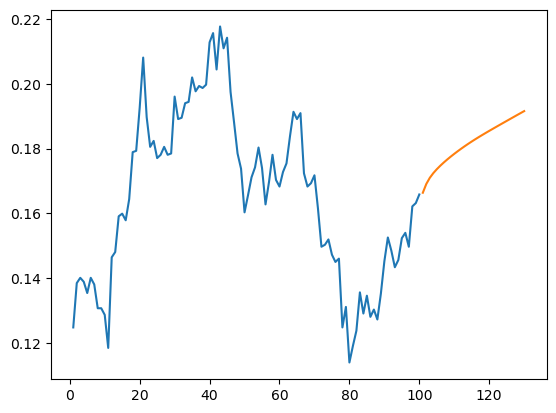

In [67]:
plt.plot(day_new,scaler.inverse_transform(df1[1935:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

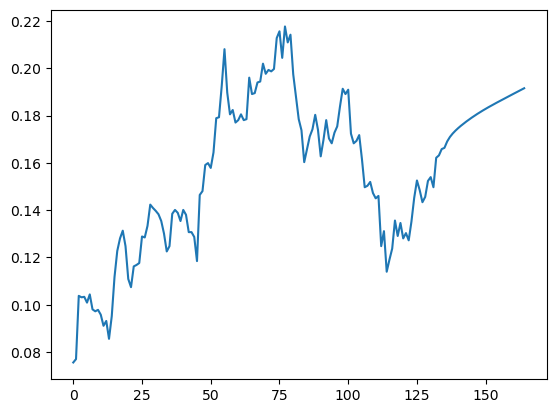

In [72]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1900:])


In [73]:
df3=scaler.inverse_transform(df3).tolist()

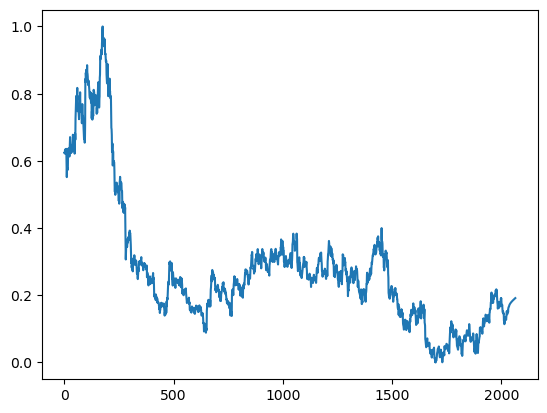

In [74]:
plt.plot(df3)